Project: Problem Statement - Personal Loan Campaign Modelling
Thera Bank Personal Loan Campaign
 
Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

Domain:
Banking

 

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
ID: Customer ID<br>
Age: Customer's age in completed years<br>
Experience: #years of professional experience<br>
Income: Annual income of the customer ($000)<br>
ZIP Code: Home Address ZIP<br>
Family: Family size of the customer<br>
CCAvg: Avg. spending on credit cards per month ($000)<br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
Mortgage: Value of house mortgage if any. ($000)<br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
Securities Account: Does the customer have a securities account with the bank?<br>
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?v
Online: Does the customer use internet banking facilities?<br>
Credit card: Does the customer use a credit card issued by the bank?<br>
 

Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

Steps and tasks:
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)<br><br>
EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)<br><br>
Number of unique in each column?<br>
Number of people with zero mortgage?<br>
Number of people with zero credit card spending per month?<br>
Value counts of all categorical columns.<br>
Univariate and Bivariate<br>
Get data model ready<br><br>
Split the data into training and test set in the ratio of 70:30 respectively (5 marks)<br><br>
Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)<br><br>
Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)<br><br>
Give conclusion related to the Business understanding of your model? (5 marks)<br><br>

# Step 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [245]:
import pandas as pd
import numpy as np


#importing plotting libraries
import matplotlib.pyplot as plt

# to enable plotting graphs  in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes = True)

#use sklearn data split function to split data into training set and test set
from sklearn.model_selection import train_test_split

# increase cell width and height 
from IPython.core.display import HTML, display
display(HTML("<style>div.output_scroll {width:100%; height:50em}<style>"))


from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

In [126]:
# Read data using pandas
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.shape

(5000, 14)

In [127]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [128]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights from info 
* Data set has 14 columns<br>
* no null values in any columns<br>
* There are 5000 observations in the data set.<br>
* All columns have numeric data( with one column being float -CCAvg, all other are interger datatype)

In [129]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [130]:
len(bank[bank['Experience']<0])

52

### Insights from describe
* id's start range from 1 - 5000.
* Customer age is between 23 - 67 years
* Experience column, minimum values shows up to be -3 which looks wrong. 
    The experience can be either 0 or +ve number.
    There are 52 records with -ve Experience.Incorrect data points are imputed with suitable values in later part 
    of the code.
* The number of Family members( Family col) range from(1-4)
* As per the given objective, the dependent variable should be 'Personal Loan'
    


In [131]:
print(bank.isnull().sum())
# There are no null values

print('\nColumns Names in the data set:\n',bank.columns)
print('\nColumn Data types in the data set:\n',bank.dtypes)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Columns Names in the data set:
 Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Column Data types in the data set:
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online 

# Step 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

Number of unique in each column?<br>
Number of people with zero mortgage?<br>
Number of people with zero credit card spending per month?<br>
Value counts of all categorical columns.<br>
Univariate and Bivariate<br>
Get data model ready<br>


In [132]:
#Number of unique in each column
bank.nunique()  # get number of unique values in each column.

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [133]:
#Number of people with zero mortgage

print("number of customers with Mortgage=0: ", len(bank[bank['Mortgage']==0]))

print("Number of customers whose is Mortgage=0 and have not accepted loan:")
print(len(bank[(bank['Mortgage']==0) & (bank['Personal Loan']==0)]))

print("Number of customers whose is Mortgage=0 and have accepted loan:")
print(len(bank[(bank['Mortgage']==0) & (bank['Personal Loan']==1)]))

number of customers with Mortgage=0:  3462
Number of customers whose is Mortgage=0 and have not accepted loan:
3150
Number of customers whose is Mortgage=0 and have accepted loan:
312


### Insights 
Most of the customers whose Mortgage value of their house is zero did not accept personal loan.

In [134]:
#Number of people with zero credit card spending per month


print("number of customers with CCAvg=0: ", len(bank[bank['CCAvg']==0.0]))

print("Number of customers whose is CCAvg=0 and have not accepted loan:")
print(len(bank[(bank['CCAvg']==0.0) & (bank['Personal Loan']==0)]))

print("Number of customers whose is CCAvg=0 and have accepted loan:")
print(len(bank[(bank['CCAvg']==0.0) & (bank['Personal Loan']==1)]))

number of customers with CCAvg=0:  106
Number of customers whose is CCAvg=0 and have not accepted loan:
105
Number of customers whose is CCAvg=0 and have accepted loan:
1


### Insights
All most all customers(except one) whose CCAvg value is zero did not accept personal loan.

In [135]:
category_cols = [ 'Family', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

for col in category_cols:
    print(bank[col].value_counts())
    print('\n')

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


1    2096
3    1501
2    1403
Name: Education, dtype: int64


0    4520
1     480
Name: Personal Loan, dtype: int64


0    4478
1     522
Name: Securities Account, dtype: int64


0    4698
1     302
Name: CD Account, dtype: int64


1    2984
0    2016
Name: Online, dtype: int64


0    3530
1    1470
Name: CreditCard, dtype: int64




### Insights from value conts 
* More number of customers are undergraduates.
* Only 480 members of 5000 accepted Personal Loans
* Only 512 customers have Security Account
* There are more number online customers when compared to other types of accounts like(CD Account,Security Accounts)


# Univariant and Bivariant Plots

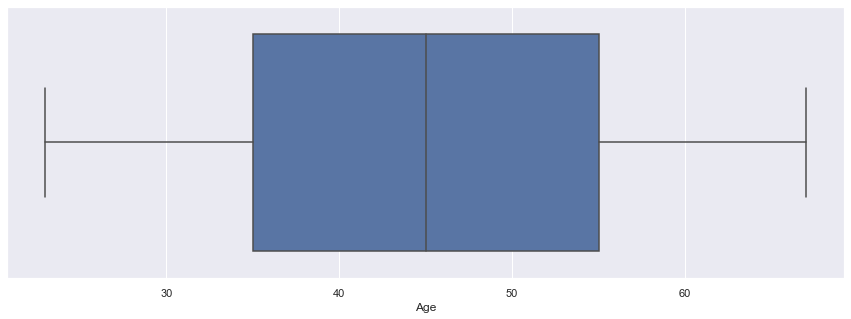

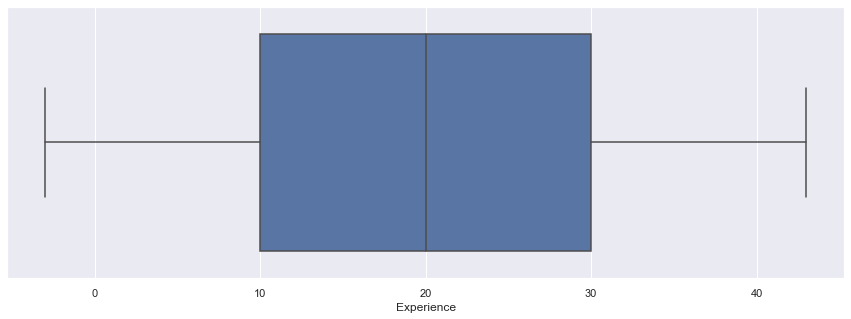

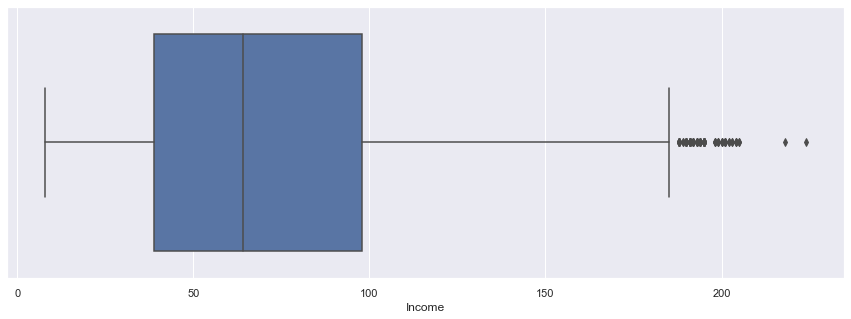

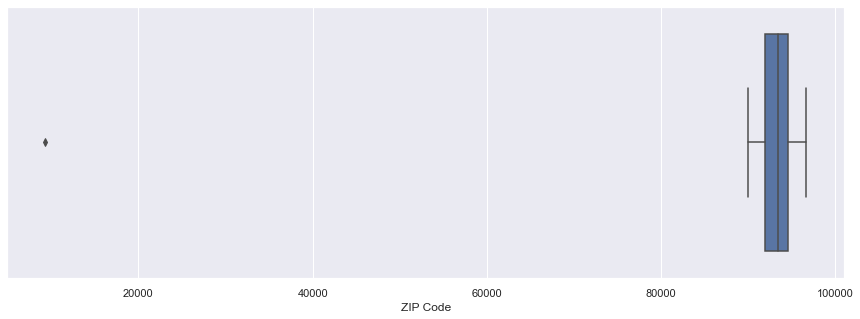

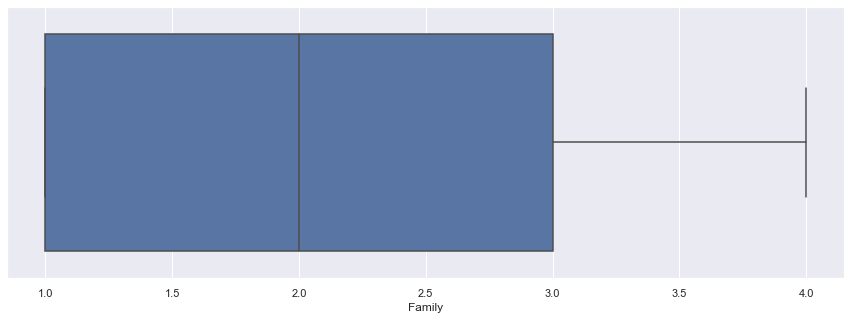

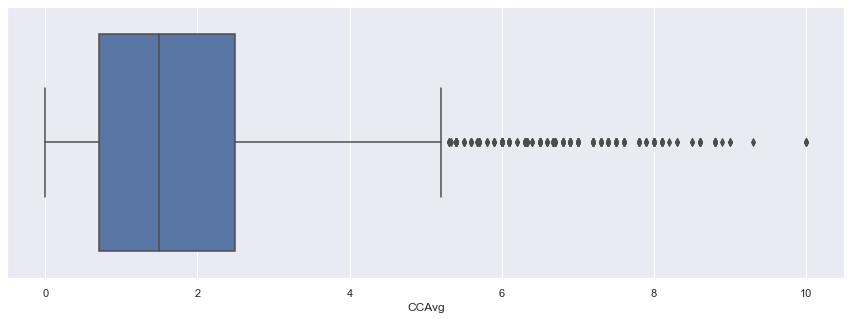

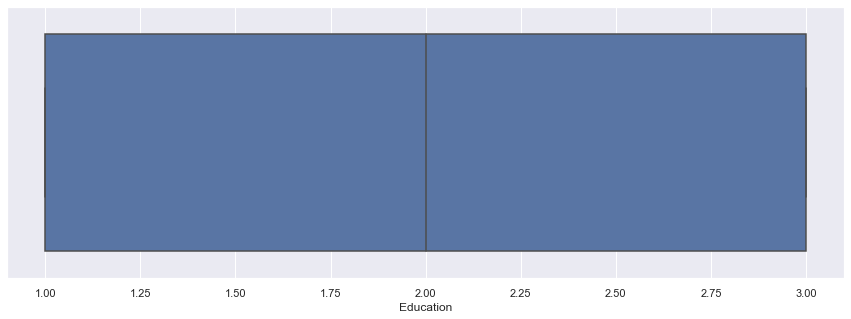

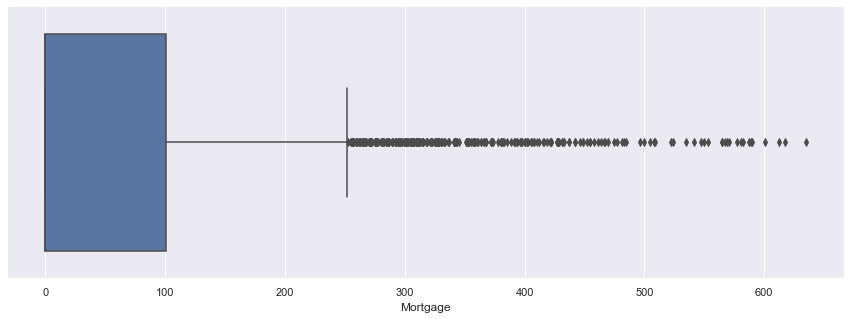

In [136]:
# box plots to understand the outliers

num_cols = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage']

for col in num_cols:
    plt.figure(figsize=(15,5))
    g = sns.boxplot(bank[col])

1. Income column shows couple of outliers towords right
2. CCAvg has more outlier on right
3. Mortgage has outlier on right

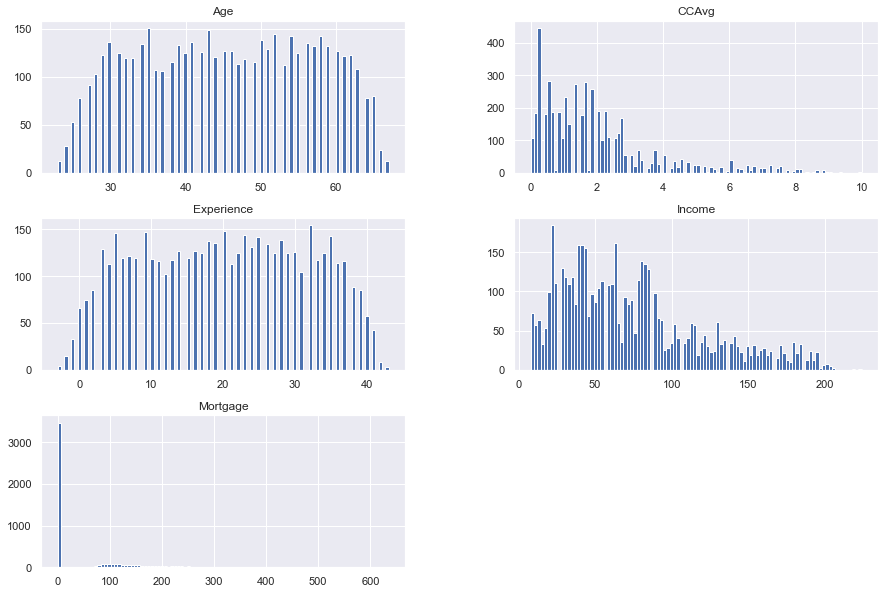

In [137]:
bank_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


bank[bank_cols].hist(stacked=False, bins=100, figsize=(15,50), layout=(14,2)); 

#for cols in bank_cols:
    #plt.figure(figsize=(15,5))
    #g = sns.distplot(bank[cols])

### Insights from Univariant dist plots
* Income, CCAvg, Mortgage data is left skewed.
* Experience and Age are equally distributed.
* Graph shows few counts having -ve experience which needs to be imputed.
* Majority of customers have zero mortgage

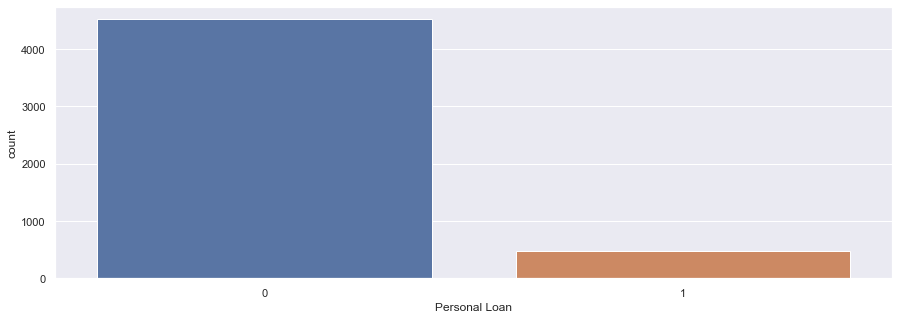

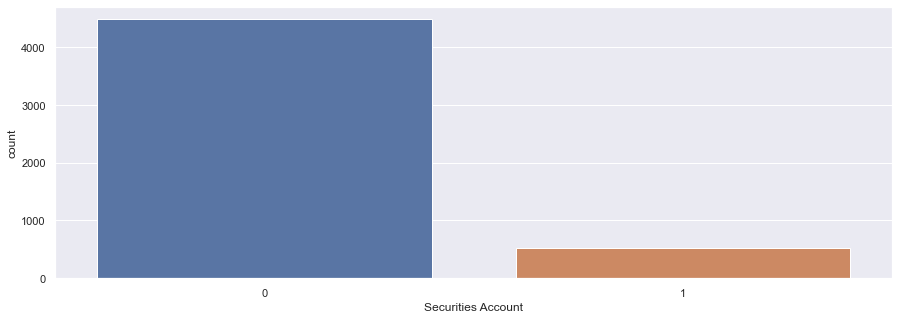

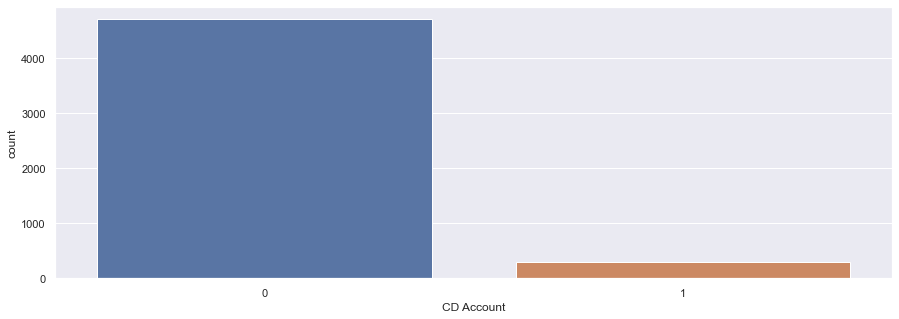

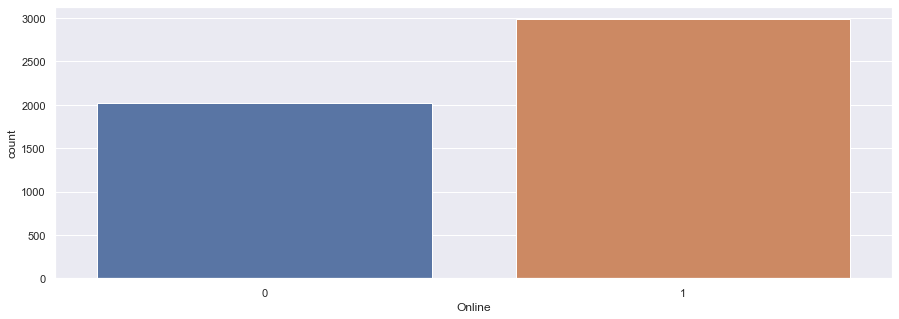

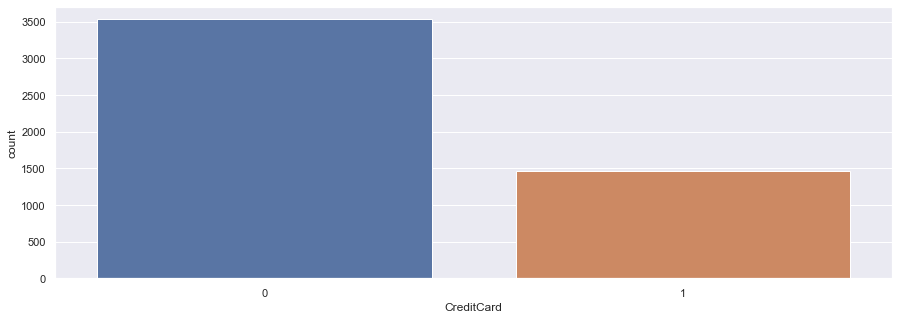

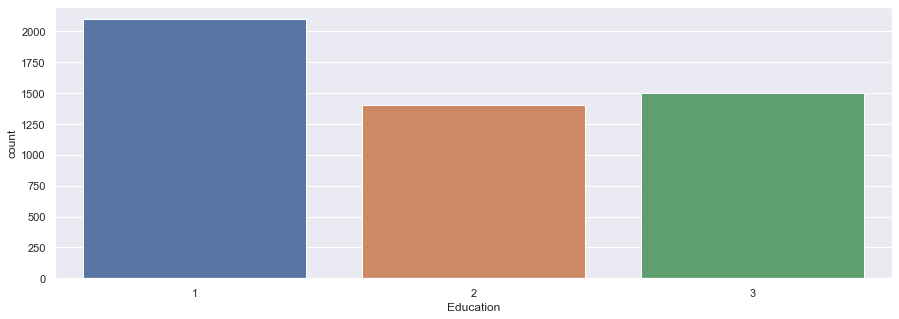

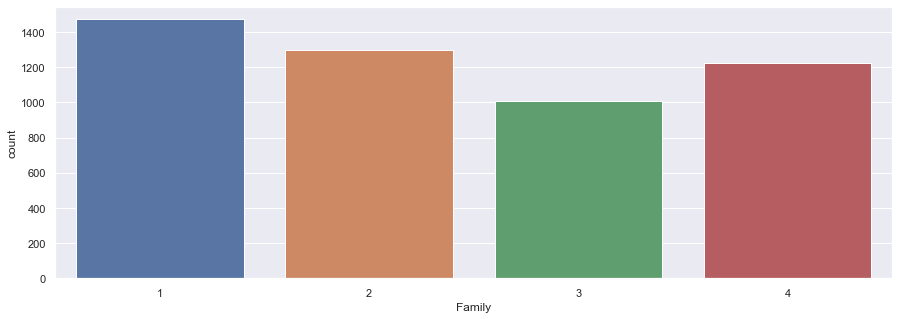

In [147]:
bank_cols = ['Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard','Education','Family']

for cols in bank_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(bank[cols])

### Insights from count graphs

* Majority of customers have no Personal Loans, Security Accounts,CD Account.
* There are more Undergraduate customers.
* There are more number of customers with single member family.


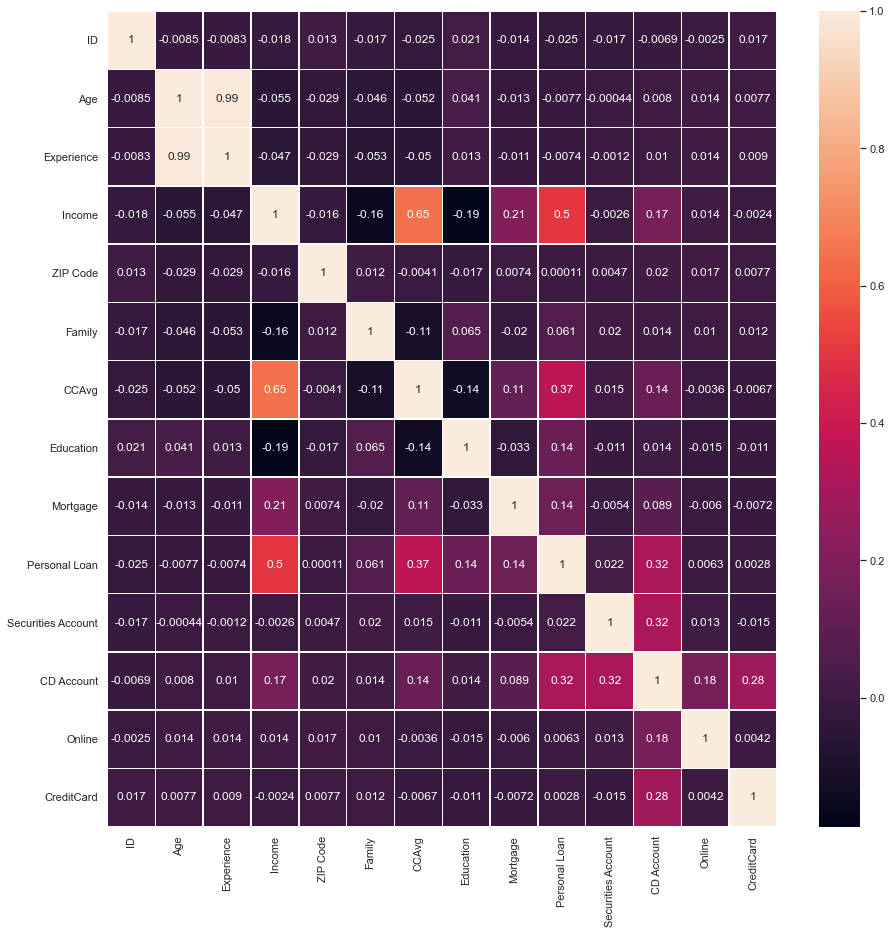

In [139]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(bank.corr(),annot=True, linewidths=.5, ax=ax)

In [213]:
bank_copy = bank.copy()
bank.corr()
print(bank.corr()['Personal Loan'].sort_values(ascending=False)) # corr values with Personal Loan

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64


### Observations from Correlation results and heatmap

* From corr() values, Personal Loan corr() is 
            more dependent on Income,CCAvg,CDAccount
            to some extent on Mortgage,Education



### Bivariant Plots

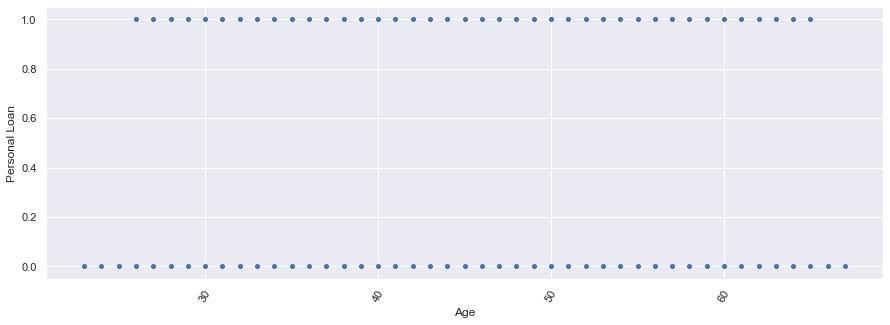

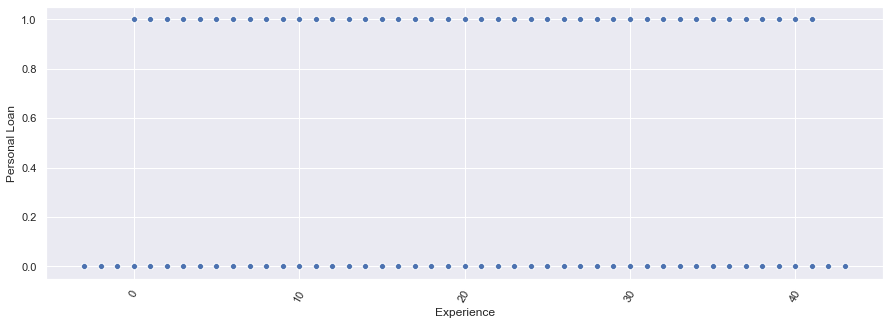

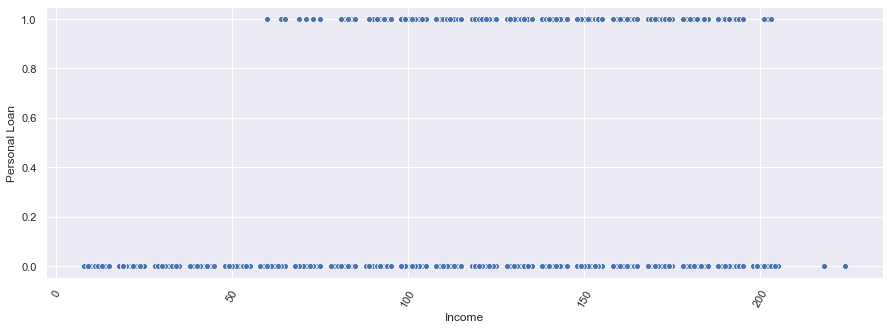

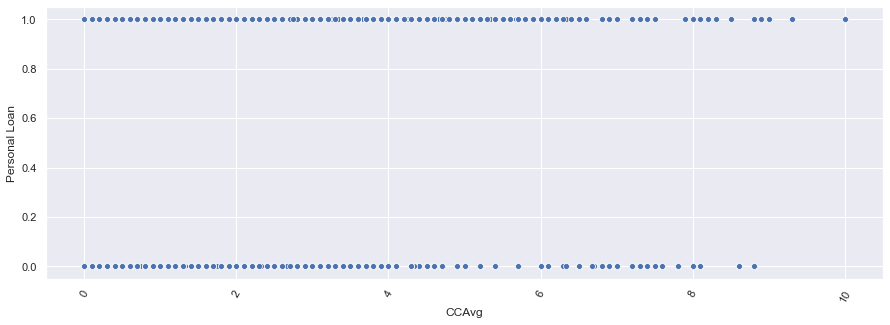

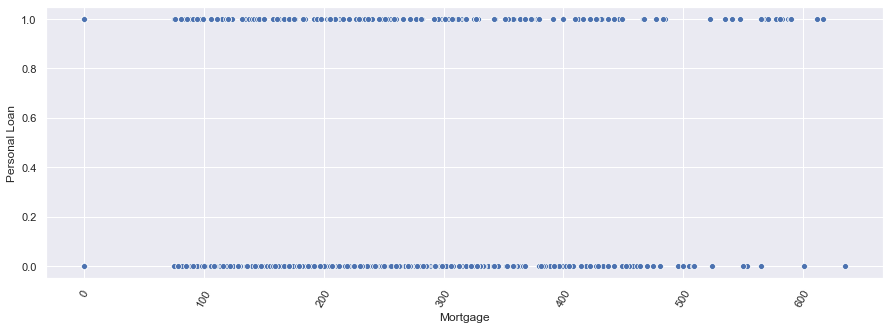

In [220]:
# Numeric Columns

bank_cols1 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

for col in bank_cols1:
    plt.figure(figsize=(15,5))  # set fig size
    plt.xticks(rotation = 60)   # rotate x axis labels to 60 deg
    g = sns.scatterplot(x=col,y='Personal Loan',data=bank)


### Insights from Scatter plots
1. Personal loan is not accepted by people below 25 years and above 65 years(approx).
2. Personal Loan is also taken by customers with zero experience
3. Customers with -ve experience values have not accepted personal loans.
4. Customers with salary more than 60K(approx) have accepted loan
5. Looks like customers with (Low to medium) CCAvg are equally distributed between accepting and rejecting Personal Loan.
    But Customers with high CCAvg are less popular in accepting personal loans than people with (Low to medium) CCAvg
6. Customers even with zero mortgage value have accepted loans.


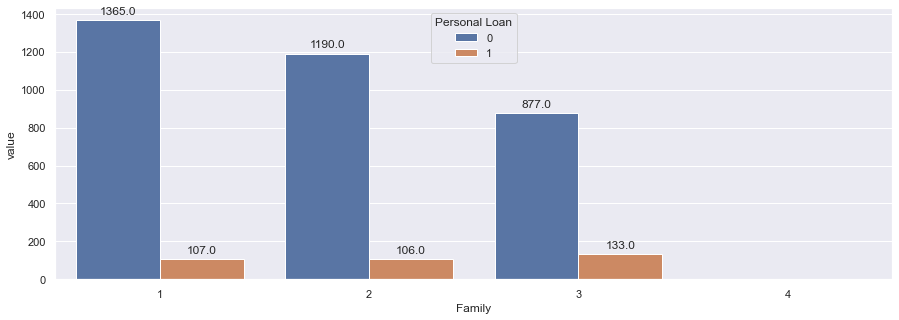

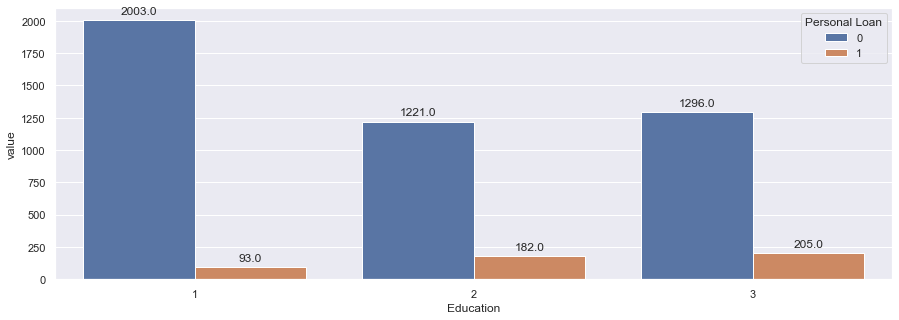

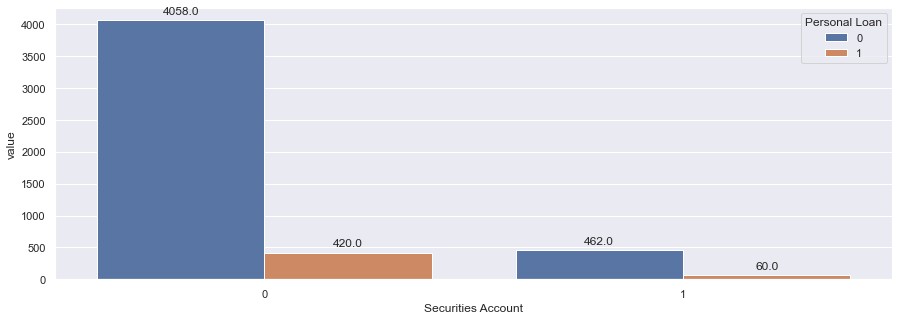

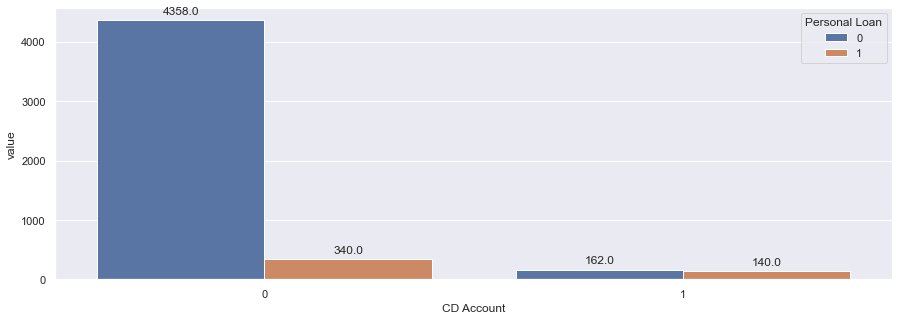

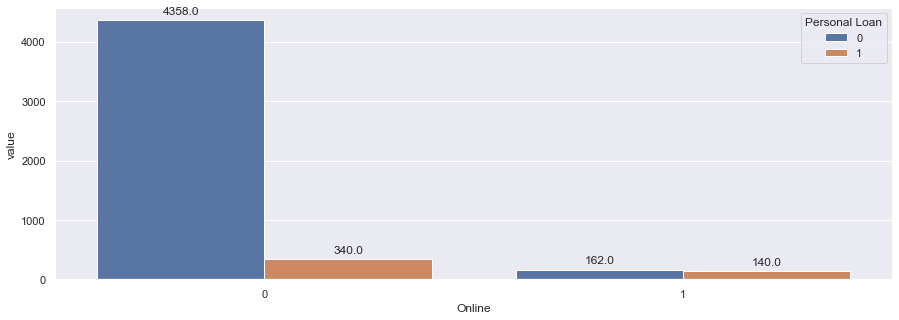

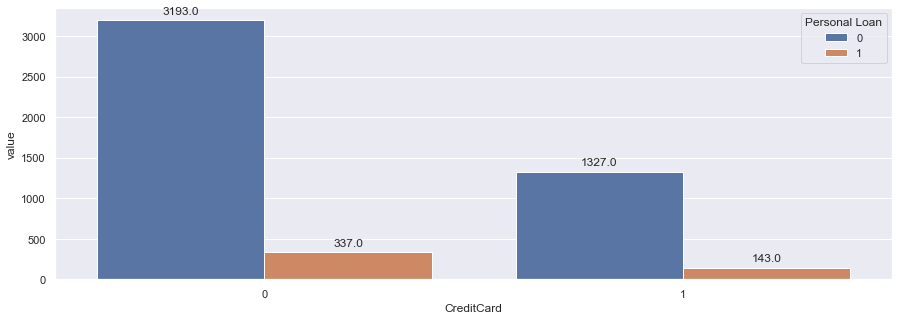

In [207]:
bank_cols2 = ['Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'] 
family_df = pd.crosstab(bank['Family'],bank['Personal Loan'])
family_stacked = family_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=family_stacked['Family'],y=family_stacked['value'],hue='Personal Loan',data=edu_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


edu_df = pd.crosstab(bank['Education'],bank['Personal Loan'])
edu_stacked = edu_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=edu_stacked['Education'],y=edu_stacked['value'],hue='Personal Loan',data=edu_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



sec_df = pd.crosstab(bank['Securities Account'],bank['Personal Loan'])
sec_stacked = sec_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=sec_stacked['Securities Account'],y=sec_stacked['value'],hue='Personal Loan',data=sec_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



cd_df = pd.crosstab(bank['CD Account'],bank['Personal Loan'])
cd_stacked = cd_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=cd_stacked['CD Account'],y=cd_stacked['value'],hue='Personal Loan',data=cd_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

online_df = pd.crosstab(bank['Online'],bank['Personal Loan'])
online_stacked = online_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=online_stacked['Online'],y=cd_stacked['value'],hue='Personal Loan',data=online_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    

cc_df = pd.crosstab(bank['CreditCard'],bank['Personal Loan'])
cc_stacked = cc_df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,5)) 
g = sns.barplot(x=cc_stacked['CreditCard'],y=cc_stacked['value'],hue='Personal Loan',data=cc_stacked)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### Insights from barplots

1. Customers  with 3 family members accepted more Personal Loans.
2. Majority of customers with no Security Account accepted Personal Loans.
3. Majority of customers with no CD Account accepted Personal Loans.
3. Majority of customers with no Online Account accepted Personal Loans.
3. Majority of customers with no CreditCard accepted Personal Loans.

### Imputing Incorrect values

In [235]:
# Few rows have -ve Experience which is not correct. The -ve values are replaced with 0(assuming they have no experience)
z = bank[(bank['Experience']<0)]
z['Experience'] = 0

bank.update(z)

bank[(bank['Experience']<0)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [239]:
n_true = len(bank.loc[bank['Personal Loan'] == 1])
n_false = len(bank.loc[bank['Personal Loan'] == 0])
print("Number of customers accepted personal loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers regected personal loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers accepted personal loan: 480 (9.60%)
Number of customers regected personal loan: 4520 (90.40%)


# Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [271]:
X = bank.drop(['ID','Personal Loan','ZIP Code'],axis=1)
Y = bank['Personal Loan'].astype('category')     

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [273]:
print("Number of customers accepted PersonalLoan in Total Dataset  : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 1]), (len(bank.loc[bank['Personal Loan'] == 1])/len(bank.index)) * 100))
print("Number of customers accepted PersonalLoan in Total Dataset  : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 0]), (len(bank.loc[bank['Personal Loan'] == 0])/len(bank.index)) * 100))
print("")
print("Number of customers accepted PersonalLoan in Training Dataset    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Number of customers rejected PersonalLoan in Training Dataset   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Number of customers accepted PersonalLoan in Test Dataset        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Number of customers rejected PersonalLoan in Test Dataset       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Number of customers accepted PersonalLoan in Total Dataset  : 480 (9.60%)
Number of customers accepted PersonalLoan in Total Dataset  : 4520 (90.40%)

Number of customers accepted PersonalLoan in Training Dataset    : 342 (9.77%)
Number of customers rejected PersonalLoan in Training Dataset   : 3158 (90.23%)

Number of customers accepted PersonalLoan in Test Dataset        : 138 (9.20%)
Number of customers rejected PersonalLoan in Test Dataset       : 1362 (90.80%)



In [274]:
# call Logistic Regression on training data
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(solver='liblinear')

In [275]:
# predict the values of Personal Loan for test data

y_predict = logreg.predict(X_test)  

In [276]:
z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
3406,42.0,12.0,34.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
757,52.0,28.0,81.0,3.0,1.8,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3624,58.0,28.0,70.0,1.0,1.4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,28.0,4.0,80.0,3.0,2.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3235,60.0,35.0,39.0,2.0,1.6,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [277]:
print("Number of customers accepted PersonalLoan in Test Dataset        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Number of customers rejected PersonalLoan in Test Dataset       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")


print("Number of customers accepted PersonalLoan in Prediction Dataset        : {0} ({1:0.2f}%)".format(len(y_predict[y_predict[:] == 1]), (len(y_predict[y_predict[:] == 1])/len(y_predict)) * 100))
print("Number of customers rejected PersonalLoan in Prediction Dataset       : {0} ({1:0.2f}%)".format(len(y_predict[y_predict[:] == 0]), (len(y_predict[y_predict[:] == 0])/len(y_predict)) * 100))
print("")

Number of customers accepted PersonalLoan in Test Dataset        : 138 (9.20%)
Number of customers rejected PersonalLoan in Test Dataset       : 1362 (90.80%)

Number of customers accepted PersonalLoan in Prediction Dataset        : 108 (7.20%)
Number of customers rejected PersonalLoan in Prediction Dataset       : 1392 (92.80%)



In [278]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9491428571428572

Testing accuracy 0.9533333333333334

Confusion Matrix


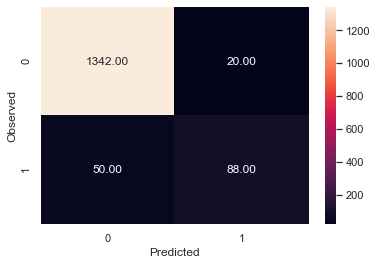

None

Recall: 0.6376811594202898

Precision: 0.8148148148148148

F1 Score: 0.7154471544715448

Roc Auc Score: 0.9621294345485114


In [279]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))

In [ ]:
Recall: 0.2826086956521739

Precision: 0.582089552238806

F1 Score: 0.38048780487804873

Roc Auc Score: 0.9357775223988593